In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Retail Store Demand dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
df.columns = ['Order_Date','Store','Item','Sales']
df.head()

,Order_Date,Store,Item,Sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
print('Number of rows: ',df.shape[0])
print('Number of columns: ',df.shape[1])

Number of rows:  913000
Number of columns:  4


In [5]:
print('Name of columns: ',df.columns.tolist())

Name of columns:  ['Order_Date', 'Store', 'Item', 'Sales']


In [6]:
#checking unique values
print('Unique values: \n',df.nunique())

Unique values: 
 Order_Date    1826
Store           10
Item            50
Sales          213
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Order_Date  913000 non-null  object
 1   Store       913000 non-null  int64 
 2   Item        913000 non-null  int64 
 3   Sales       913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [8]:
unique_rows = pd.DataFrame(df['Item'].value_counts()).reset_index()
unique_rows.head()

,index,Item
0,1,18260
1,38,18260
2,28,18260
3,29,18260
4,30,18260


In [9]:
unique_rows.columns = ['Item','count'] 

In [10]:
unique_rows.head(2)

,Item,count
0,1,18260
1,38,18260


In [11]:
#print(unique_rows)
print('Unique Item count: ',df['Item'].nunique())

Unique Item count:  50


In [12]:
print( unique_rows.head(1)['Item'].array )

<PandasArray>
[1]
Length: 1, dtype: int64


# Will make predictions on Item=50.

In [13]:
data = df.loc[df['Item']==50]
data.head(2)

,Order_Date,Store,Item,Sales
894740,2013-01-01,1,50,30
894741,2013-01-02,1,50,32


In [14]:
data.reset_index(inplace=True)
data

,index,Order_Date,Store,Item,Sales
0,894740,2013-01-01,1,50,30
1,894741,2013-01-02,1,50,32
2,894742,2013-01-03,1,50,25
3,894743,2013-01-04,1,50,32
4,894744,2013-01-05,1,50,35
...,...,...,...,...,...
18255,912995,2017-12-27,10,50,63
18256,912996,2017-12-28,10,50,59
18257,912997,2017-12-29,10,50,74
18258,912998,2017-12-30,10,50,62


In [15]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

<ipython-input-15-6a6ebeff9c0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Order_Date'] = pd.to_datetime(data['Order_Date'])


In [16]:
cols_drop = ['index','Store','Item']
data.drop(cols_drop,axis=1,inplace=True)

C:\Users\ayush\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
print('No of rows: ',data.shape[0])
print('No of columns: ',data.shape[1])
print('Min Date: ',data['Order_Date'].min())
print('Max Date: ',data['Order_Date'].max())

No of rows:  18260
No of columns:  2
Min Date:  2013-01-01 00:00:00
Max Date:  2017-12-31 00:00:00


In [18]:
data.columns = ['ds','y']
data.head()

,ds,y
0,2013-01-01,30
1,2013-01-02,32
2,2013-01-03,25
3,2013-01-04,32
4,2013-01-05,35


# Prophet Model Daily Dataset

In [19]:
from prophet import Prophet

In [20]:
m = Prophet()
m.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
m.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [22]:
future = m.make_future_dataframe(periods=365)
prophet_pred = m.predict(future)
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2186,2018-12-27,77.999161,39.293465,80.029193,74.623044,81.440733,-19.161369,-19.161369,-19.161369,-0.311948,-0.311948,-0.311948,-18.849421,-18.849421,-18.849421,0.0,0.0,0.0,58.837792
2187,2018-12-28,78.006274,43.387136,82.659802,74.616145,81.454480,-15.336466,-15.336466,-15.336466,3.504310,3.504310,3.504310,-18.840776,-18.840776,-18.840776,0.0,0.0,0.0,62.669807
2188,2018-12-29,78.013386,46.439232,88.214650,74.609247,81.468226,-10.839001,-10.839001,-10.839001,8.011051,8.011051,8.011051,-18.850051,-18.850051,-18.850051,0.0,0.0,0.0,67.174385
2189,2018-12-30,78.020498,51.303373,91.779919,74.602349,81.493883,-6.641944,-6.641944,-6.641944,12.236205,12.236205,12.236205,-18.878148,-18.878148,-18.878148,0.0,0.0,0.0,71.378554
2190,2018-12-31,78.027610,26.311252,67.066056,74.595451,81.529313,-32.486776,-32.486776,-32.486776,-13.561711,-13.561711,-13.561711,-18.925065,-18.925065,-18.925065,0.0,0.0,0.0,45.540834


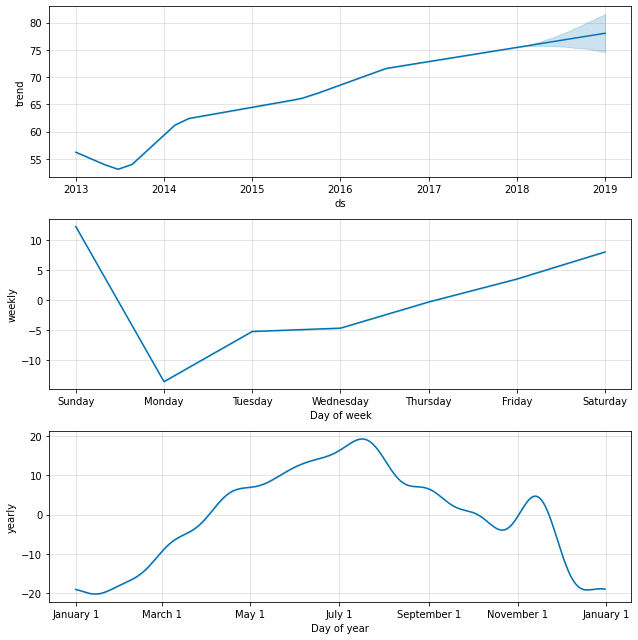

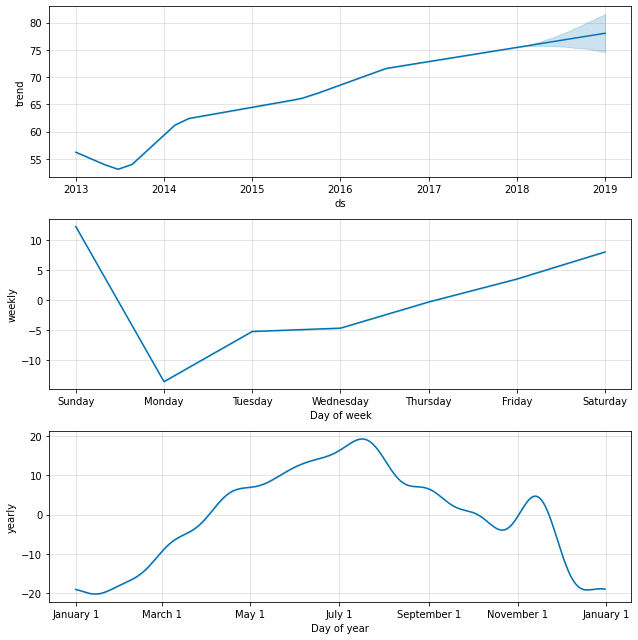

In [23]:
m.plot_components(prophet_pred)

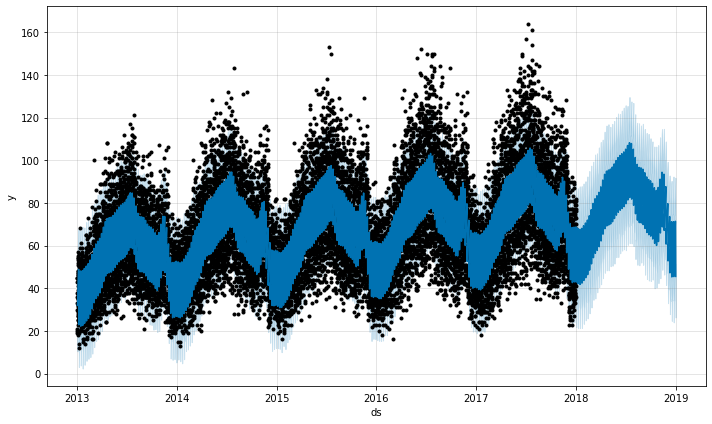

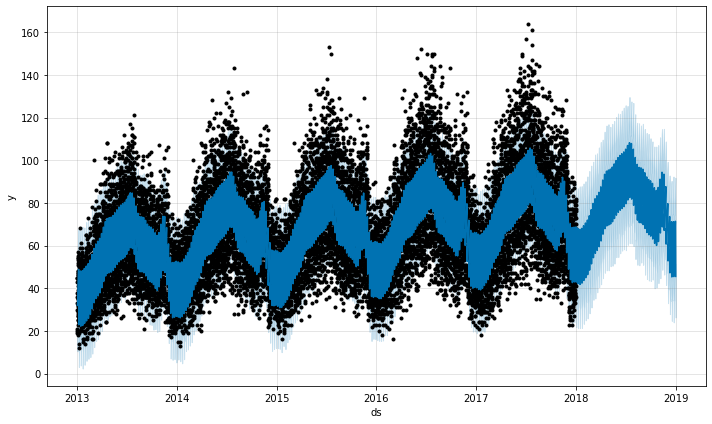

In [24]:
m.plot(prophet_pred)

In [25]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
df_cv.head()

INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-11 00:00:00 and 2016-12-31 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-12,35.309113,15.852189,53.166124,32,2015-01-11
1,2015-01-12,35.309113,17.459355,54.228857,33,2015-01-11
2,2015-01-12,35.309113,16.503089,53.306420,31,2015-01-11
3,2015-01-12,35.309113,16.456278,53.998202,32,2015-01-11
4,2015-01-12,35.309113,17.030068,52.779869,51,2015-01-11


In [26]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,250.561802,15.829144,12.660921,0.232235,0.173633,0.206630,0.765479
1,38 days,249.113236,15.783321,12.656668,0.232561,0.173708,0.206981,0.765479
2,39 days,247.851801,15.743310,12.628933,0.231576,0.173299,0.206231,0.765479
3,40 days,246.089008,15.687224,12.582230,0.230155,0.171409,0.205294,0.767123
4,41 days,246.575253,15.702715,12.613255,0.230487,0.173272,0.205583,0.767123


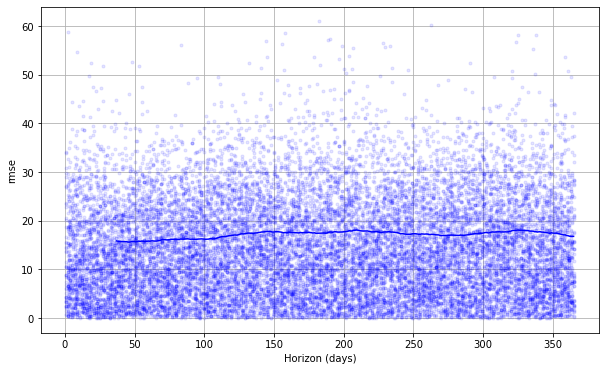

In [27]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric ='rmse')

# For Mothly_Data

In [28]:
monthly_data = data.groupby([pd.Grouper(key="ds",freq='MS')])['y'].sum().reset_index().sort_values("ds")
print(monthly_data.head(5))
print(monthly_data.shape)

          ds      y
0 2013-01-01  11467
1 2013-02-01  11566
2 2013-03-01  15687
3 2013-04-01  17518
4 2013-05-01  19001
(60, 2)


In [29]:
#monthly_data.set_index("ds",inplace=True)
#monthly_data.head(5)

In [30]:
#monthly_graph = monthly_data['y'].plot(figsize = (16,5), title="Monthly Sales - Item_50")
#monthly_graph.set(xlabel='Order_Date',ylabel='Sales - Item_50')

In [31]:
model = Prophet()
model.fit(monthly_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [33]:
monthly_future = model.make_future_dataframe(periods=12, freq='M')
monthly_prophet_pred = model.predict(monthly_future)
monthly_prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
67,2018-07-31,23863.018089,26434.475876,27767.616195,23825.444698,23909.371717,3256.648530,3256.648530,3256.648530,3256.648530,3256.648530,3256.648530,0.0,0.0,0.0,27119.666619
68,2018-08-31,23955.007192,23869.537281,25147.471242,23910.808248,24011.330488,587.134303,587.134303,587.134303,587.134303,587.134303,587.134303,0.0,0.0,0.0,24542.141495
69,2018-09-30,24044.028904,23692.345977,25006.507304,23993.063856,24110.678782,291.669649,291.669649,291.669649,291.669649,291.669649,291.669649,0.0,0.0,0.0,24335.698553
70,2018-10-31,24136.018006,23796.270981,25123.931976,24078.039137,24213.141870,327.722723,327.722723,327.722723,327.722723,327.722723,327.722723,0.0,0.0,0.0,24463.740729
71,2018-11-30,24225.039718,18064.404009,19378.080895,24157.693878,24310.265248,-5484.354450,-5484.354450,-5484.354450,-5484.354450,-5484.354450,-5484.354450,0.0,0.0,0.0,18740.685269


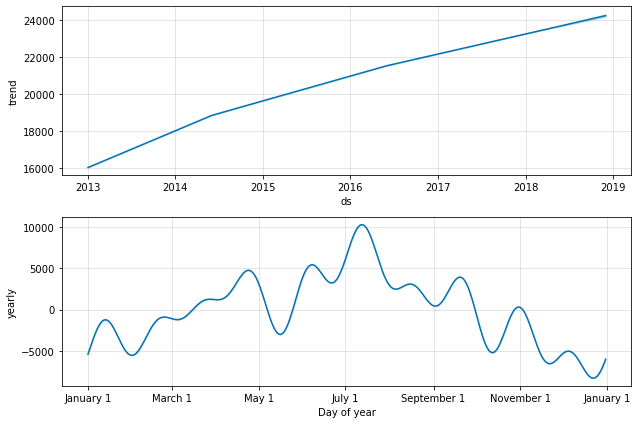

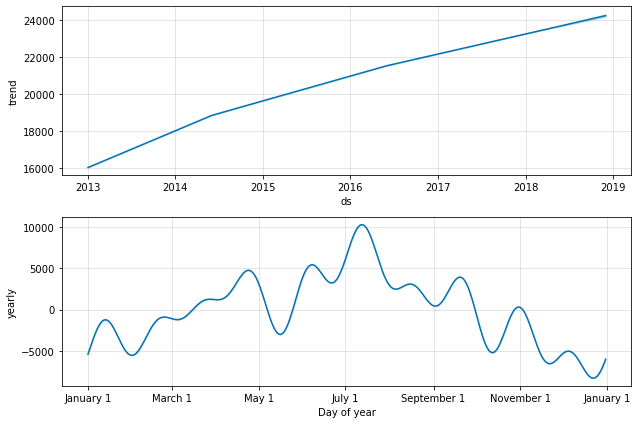

In [34]:
model.plot_components(monthly_prophet_pred)

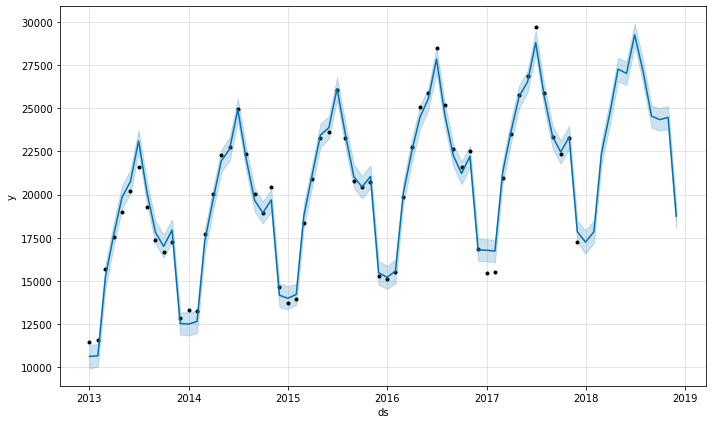

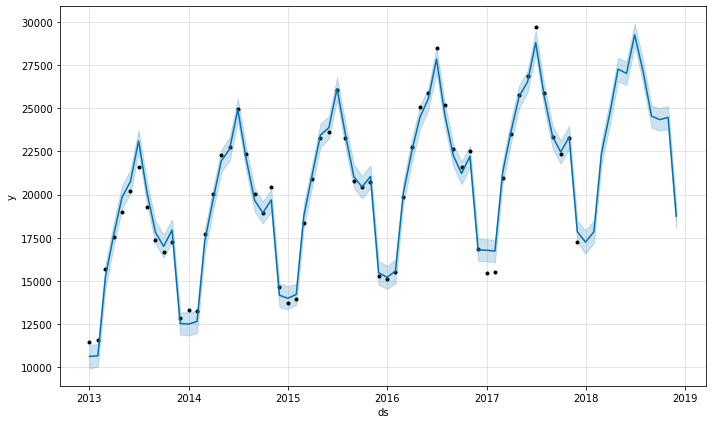

In [35]:
model.plot(monthly_prophet_pred)

In [36]:
from prophet.diagnostics import cross_validation
df_cv_monthly = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_cv_monthly.head()

INFO:prophet:Making 4 forecasts with cutoffs between 2015-06-10 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-07-01,25859.776501,25775.420487,25947.946035,26060,2015-06-10
1,2015-08-01,22778.947152,22644.160076,22945.433012,23257,2015-06-10
2,2015-09-01,20250.193594,19998.965092,20530.564630,20778,2015-06-10
3,2015-10-01,19098.920203,18701.664571,19554.501376,20454,2015-06-10
4,2015-11-01,22035.860164,21515.067147,22657.260307,20745,2015-06-10


In [37]:
from prophet.diagnostics import performance_metrics
df_p_monthly = performance_metrics(df_cv_monthly)
df_p_monthly.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,31 days,2.441486e+06,1562.525572,1172.744169,0.062795,0.035460,0.059806,0.25
1,52 days,2.488597e+06,1577.528901,1242.201506,0.066013,0.038259,0.063070,0.25
2,56 days,2.539929e+06,1593.715482,1312.265611,0.070428,0.044291,0.067592,0.00
3,58 days,1.956457e+06,1398.733998,1026.924375,0.060927,0.026587,0.057729,0.00
4,62 days,1.805436e+06,1343.665210,998.034049,0.058954,0.026587,0.056051,0.00


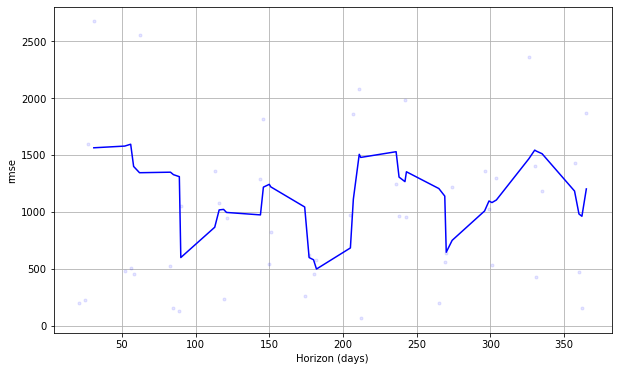

In [39]:
from prophet.plot import plot_cross_validation_metric
fig_monthly = plot_cross_validation_metric(df_cv_monthly, metric ='rmse')